In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [35]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
data


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [37]:
#lets check the null/nan value 
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [38]:
#lets check the duplicates and remove
data.drop_duplicates(inplace=True)
data.shape

(32536, 15)

In [39]:
#lets filter categorial features 
numerics = ['int8','int16','int32','int64','float16','float32','float64']

categorical_column =[]
features = data.columns.values.tolist()

for col in features:
    if data[col].dtype in numerics:
        continue
    categorical_column.append(col)
    
categorical_column

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [40]:
#lets encode the them by using label encoding
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
data['Workclass']=lab_enc.fit_transform(data['Workclass'])
data['Education']=lab_enc.fit_transform(data['Education'])
data['Marital_status']=lab_enc.fit_transform(data['Marital_status'])
data['Occupation']=lab_enc.fit_transform(data['Occupation'])
data['Relationship']=lab_enc.fit_transform(data['Relationship'])
data['Race']=lab_enc.fit_transform(data['Race'])
data['Sex']=lab_enc.fit_transform(data['Sex'])
data['Native_country']=lab_enc.fit_transform(data['Native_country'])
data['Income']=lab_enc.fit_transform(data['Income'])
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


<function matplotlib.pyplot.show(close=None, block=None)>

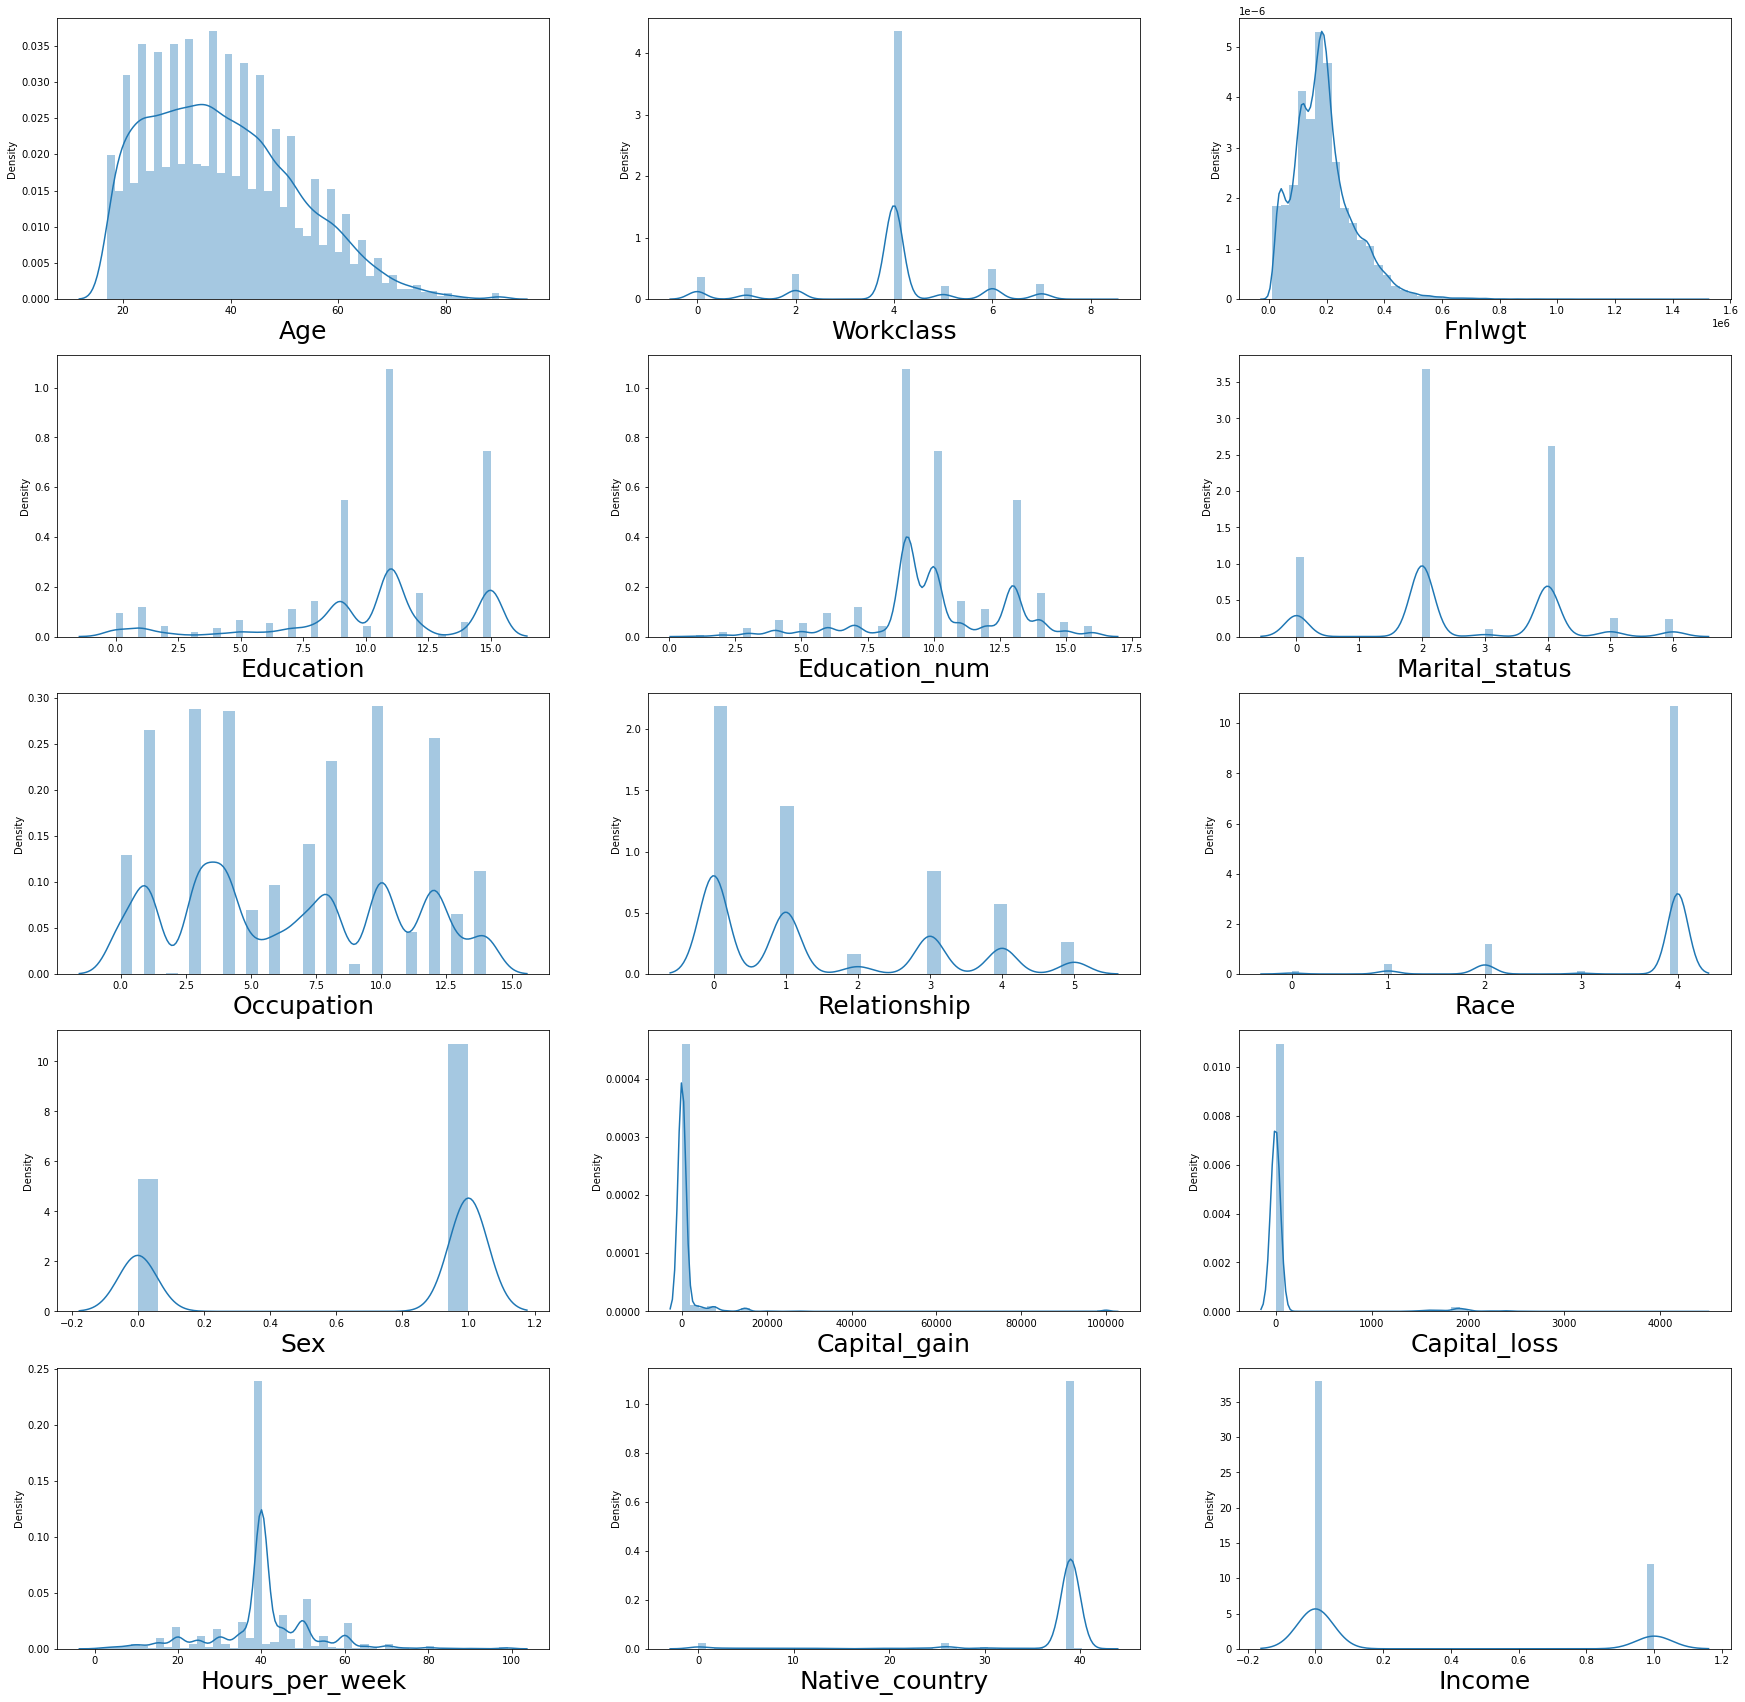

In [41]:
#check the how data is distributed for each column 
plt.figure(figsize=(30,30))
plotnumber=1

for column in data:
    if plotnumber<=15:
        ax= plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show

In [42]:
#lets remove skewness of Fnlwgt,Capital_gain,Capital_loss
data['Fnlwgt']=np.log(data['Fnlwgt'])
data['Capital_gain']=np.log(data['Capital_gain'])
data['Capital_loss']=np.log(data['Capital_loss'])

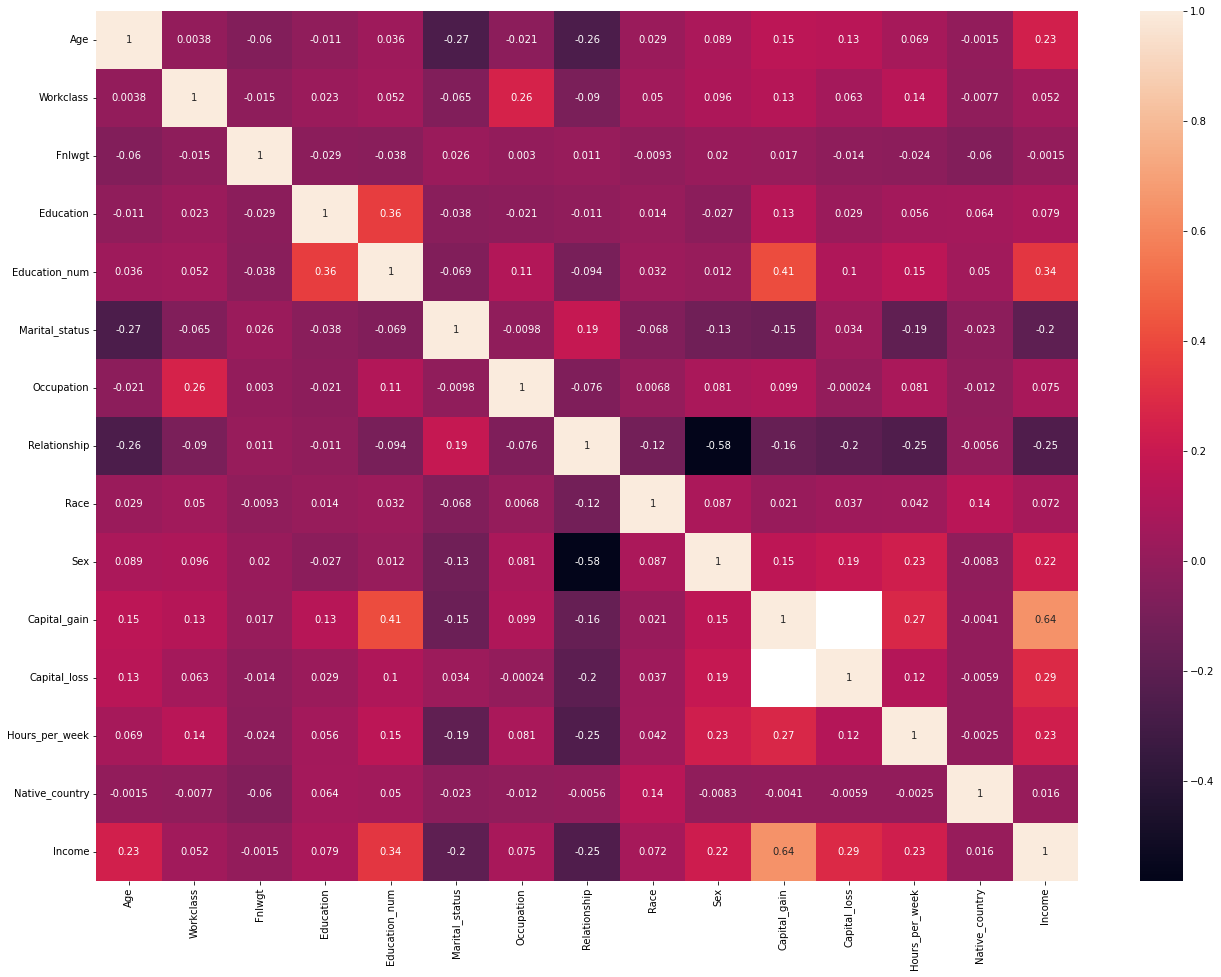

In [43]:
#lets see the correlation 
corr = data.corr()
plt.figure(figsize=(22,16))
sns.heatmap(corr, annot=True)
plt.show()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32536 non-null  int64  
 1   Workclass       32536 non-null  int32  
 2   Fnlwgt          32536 non-null  float64
 3   Education       32536 non-null  int32  
 4   Education_num   32536 non-null  int64  
 5   Marital_status  32536 non-null  int32  
 6   Occupation      32536 non-null  int32  
 7   Relationship    32536 non-null  int32  
 8   Race            32536 non-null  int32  
 9   Sex             32536 non-null  int32  
 10  Capital_gain    32536 non-null  float64
 11  Capital_loss    32536 non-null  float64
 12  Hours_per_week  32536 non-null  int64  
 13  Native_country  32536 non-null  int32  
 14  Income          32536 non-null  int32  
dtypes: float64(3), int32(9), int64(3)
memory usage: 2.9 MB


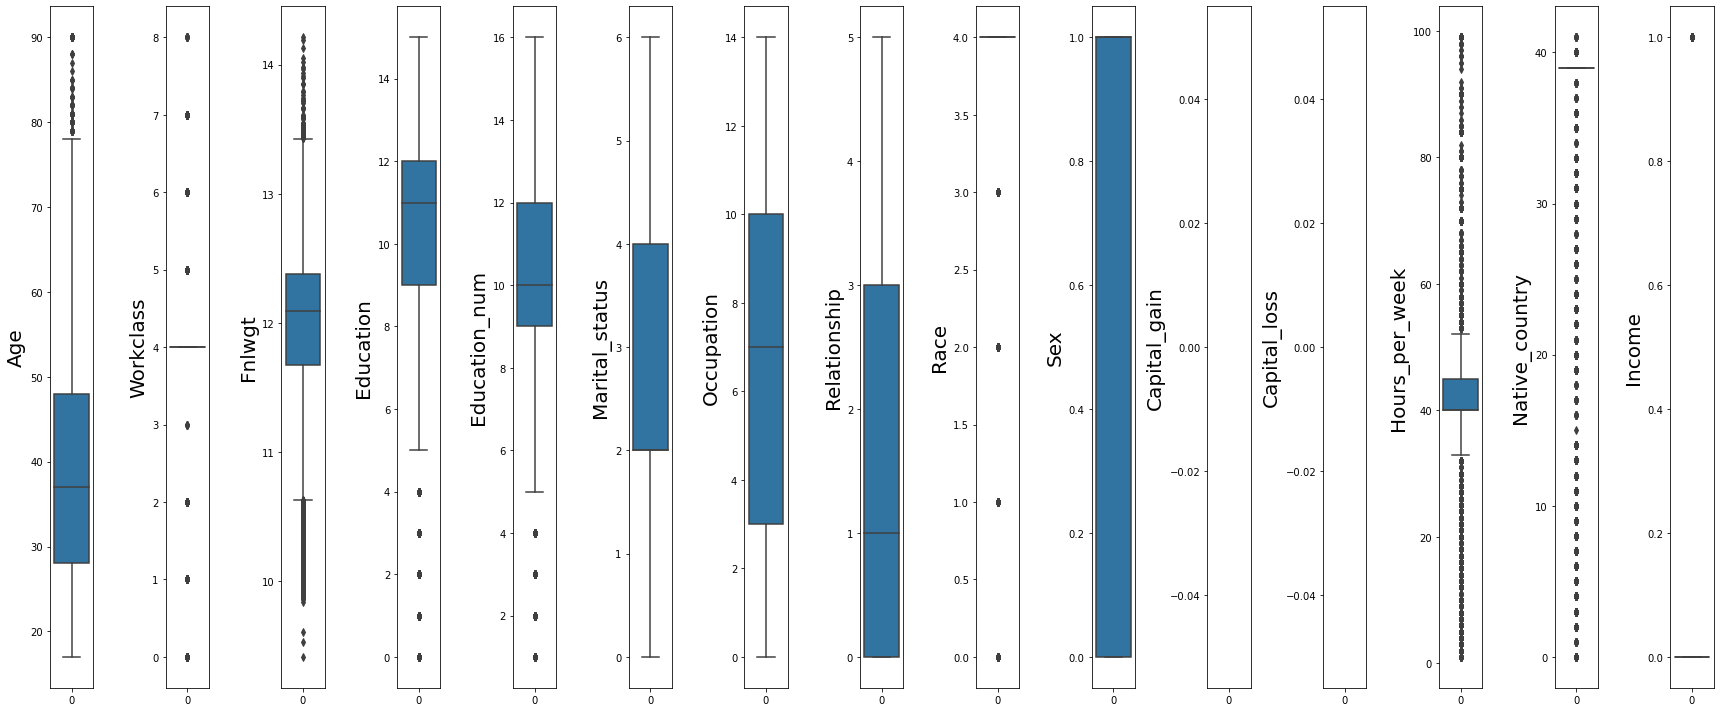

In [45]:
#lets check outlier 
plt.figure(figsize=(24,10),facecolor='white')
plotnumber =1
for column in data :
    if plotnumber<=15:
        
        ax= plt.subplot(1,15,plotnumber)
        sns.boxplot(data=data[column], orient='v')
        plt.ylabel(column,fontsize= 20)
    plotnumber+=1
plt.tight_layout()
    

In [47]:
#lets scaled and spilit data
x=data.drop('Income',axis=1)
y=data.Income


In [48]:
# Lets build model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

In [50]:
lr=LogisticRegression()
kn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [51]:
#all models score 
lr.fit(x_test,y_test)
kn.fit(x_test,y_test)
dt.fit(x_test,y_test)
rf.fit(x_test,y_test)

print('all models are tested')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [52]:
x.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
dtype: int64